# Xoak basic examples

Those examples show how to use `xoak` for indexing irrelgularly spaced data with spherical coordinates (lat, lon) using a ball-tree structure with the haversine distance metric.

Thanks to Xarray's advanced indexing, `xoak` supports (lat, lon) coordinates stored as arrays of any number of dimension (1, 2, ..., n-d). There are some constraints, though (not really limitations but things to be aware of):


- Indexers (selectors) must be xarray objects!
- The coordinates used to build the index must all have the same dimension(s) (same order).
- Indexers provided in .xoak.sel() must all have the same dimensions.
- Indexers must be provided in .xoak.sel() for every coordinate used to build the index (i.e., both latitude and longitude in the examples below).


In [1]:
import numpy as np
import xarray as xr
import xoak

## Example 1

2-d coordinates (e.g., NEMO), 1-d indexers (e.g., ship track)

In [2]:
shape = (100, 100)
lat = np.random.uniform(-90, 90, size=shape)
lon = np.random.uniform(-180, 180, size=shape)

field = lat + lon


ds_2d = xr.Dataset(
    coords={'lat': (('x', 'y'), lat), 'lon': (('x', 'y'), lon)},
    data_vars={'field': (('x', 'y'), field)},
)

ds_2d

<xarray.Dataset>
Dimensions:  (x: 100, y: 100)
Coordinates:
    lat      (x, y) float64 -80.79 -10.39 -74.74 -77.76 ... -33.23 15.97 9.155
    lon      (x, y) float64 159.4 11.46 -153.8 38.71 ... -134.9 -29.72 152.2
Dimensions without coordinates: x, y
Data variables:
    field    (x, y) float64 78.65 1.067 -228.6 -39.05 ... -168.2 -13.75 161.4

In [3]:
ds_2d.xoak.set_index(['lat', 'lon'], transform=np.deg2rad, metric='haversine')

In [4]:
ds_indexer_1d = xr.Dataset({
    'latitude': ('points', np.random.uniform(-90, 90, size=50)),
    'longitude': ('points', np.random.uniform(-180, 180, size=50))
})

ds_sel = ds_2d.xoak.sel(
    lat=ds_indexer_1d.latitude,
    lon=ds_indexer_1d.longitude
)

ds_sel

<xarray.Dataset>
Dimensions:  (points: 50)
Coordinates:
    lat      (points) float64 -56.8 56.22 -78.25 68.43 ... 30.5 21.96 -76.0
    lon      (points) float64 -84.84 -155.7 103.5 45.06 ... 52.72 6.8 36.47
Dimensions without coordinates: points
Data variables:
    field    (points) float64 -141.6 -99.52 25.24 113.5 ... 83.22 28.76 -39.54

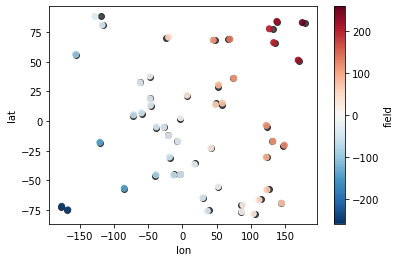

In [5]:
ds_indexer_1d.plot.scatter(x='longitude', y='latitude', c='k', alpha=0.7);
ds_sel.plot.scatter(x='lon', y='lat', hue='field', alpha=0.9);

## Example 2

2-d coordinates (e.g., NEMO), 2-d indexers (e.g., another model grid?)

In [6]:
ds_indexer_2d = xr.Dataset({
    'latitude': (('x1', 'y1'), np.random.uniform(-90, 90, size=(20, 50))),
    'longitude': (('x1', 'y1'), np.random.uniform(-180, 180, size=(20, 50)))
})

ds_sel = ds_2d.xoak.sel(
    lat=ds_indexer_2d.latitude,
    lon=ds_indexer_2d.longitude
)

ds_sel

<xarray.Dataset>
Dimensions:  (x1: 20, y1: 50)
Coordinates:
    lat      (x1, y1) float64 -77.0 62.24 -14.26 -35.65 ... -37.03 62.19 46.17
    lon      (x1, y1) float64 164.1 140.4 -67.11 131.5 ... 162.9 -36.25 -66.78
Dimensions without coordinates: x1, y1
Data variables:
    field    (x1, y1) float64 87.14 202.6 -81.37 95.86 ... 125.9 25.94 -20.61

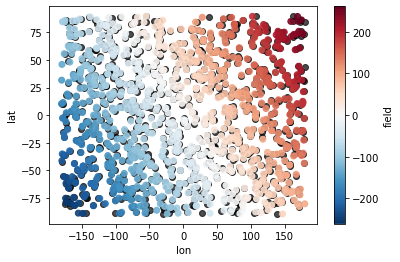

In [7]:
ds_indexer_2d.plot.scatter(x='longitude', y='latitude', c='k', alpha=0.7);
ds_sel.plot.scatter(x='lon', y='lat', hue='field', alpha=0.9);

## Example 3

1-d coordinates (e.g., FESOM2), 1-d indexers

In [8]:
lat = np.random.uniform(-90, 90, size=10000)
lon = np.random.uniform(-180, 180, size=10000)

field = lat + lon


ds_1d = xr.Dataset(
    coords={'lat': (('nodes'), lat), 'lon': (('nodes'), lon)},
    data_vars={'field': (('nodes'), field)},
)

ds_1d

<xarray.Dataset>
Dimensions:  (nodes: 10000)
Coordinates:
    lat      (nodes) float64 30.9 49.12 4.963 64.06 ... -38.57 31.24 37.95 64.31
    lon      (nodes) float64 -80.67 -67.81 -24.35 89.45 ... 69.17 115.4 65.6
Dimensions without coordinates: nodes
Data variables:
    field    (nodes) float64 -49.78 -18.69 -19.39 153.5 ... 100.4 153.3 129.9

In [9]:
ds_1d.xoak.set_index(['lat', 'lon'], transform=np.deg2rad, metric='haversine')

In [10]:
ds_sel = ds_1d.xoak.sel(
    lat=ds_indexer_1d.latitude,
    lon=ds_indexer_1d.longitude
)

ds_sel

<xarray.Dataset>
Dimensions:  (points: 50)
Coordinates:
    lat      (points) float64 -57.48 55.55 -78.33 67.68 ... 29.89 21.38 -75.14
    lon      (points) float64 -86.35 -153.1 108.8 48.39 ... 50.82 4.812 39.42
Dimensions without coordinates: points
Data variables:
    field    (points) float64 -143.8 -97.54 30.46 116.1 ... 80.71 26.19 -35.72

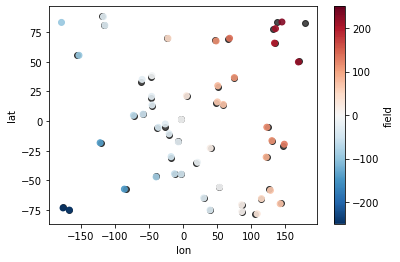

In [11]:
ds_indexer_1d.plot.scatter(x='longitude', y='latitude', c='k', alpha=0.7);
ds_sel.plot.scatter(x='lon', y='lat', hue='field', alpha=0.9);

## Example 4

1-d coordinates (e.g., FESOM2), 2-d indexers

In [12]:
ds_sel = ds_1d.xoak.sel(
    lat=ds_indexer_2d.latitude,
    lon=ds_indexer_2d.longitude
)

ds_sel

<xarray.Dataset>
Dimensions:  (x1: 20, y1: 50)
Coordinates:
    lat      (x1, y1) float64 -77.47 61.5 -13.89 -34.18 ... -35.42 61.33 43.9
    lon      (x1, y1) float64 165.1 141.3 -65.72 130.8 ... 163.9 -36.31 -66.68
Dimensions without coordinates: x1, y1
Data variables:
    field    (x1, y1) float64 87.59 202.8 -79.62 96.62 ... 128.5 25.02 -22.78

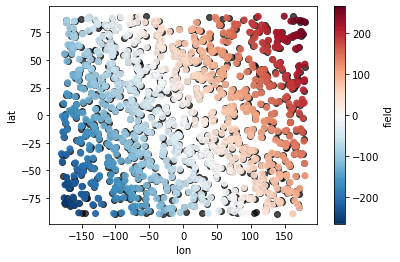

In [13]:
ds_indexer_2d.plot.scatter(x='longitude', y='latitude', c='k', alpha=0.7);
ds_sel.plot.scatter(x='lon', y='lat', hue='field', alpha=0.9);